In [1]:
import sys
sys.path.append('../wamuu')

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [3]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from time import time

from instance import Instance
from grasp import grasp
from cost import cost

First we choose an instance to work on

In [4]:
I = Instance(
    instance_dir='../data/raw',
    instance='n120_s04_t01_w01'
)

Let's see what it looks like

In [5]:
G = nx.Graph()
for i in range(I.n+1): G.add_node(i, pos=I.nodes[i])
pos = nx.get_node_attributes(G, 'pos')

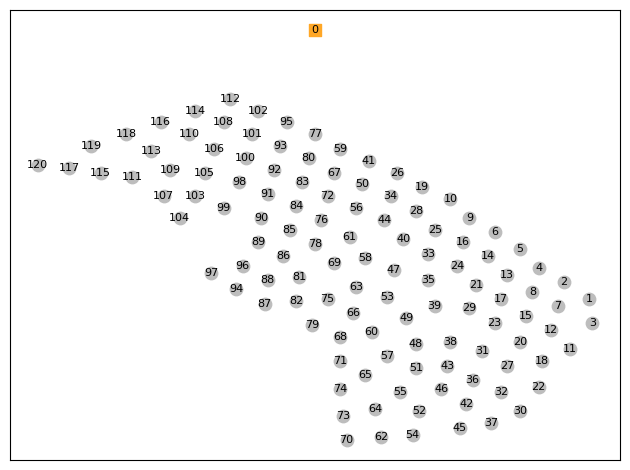

In [6]:
nx.draw_networkx_nodes(G, pos,
                       nodelist=[0],
                       node_color='#FFA726',
                       node_size=80,
                       node_shape='s')
nx.draw_networkx_nodes(G, pos,
                       nodelist=range(1, I.n+1),
                       node_color='#BDBDBD',
                       node_size=80)
nx.draw_networkx_labels(G, pos,
                        font_size=8)
plt.tight_layout()
plt.show()

Let's run sweep with arbitrary parameters first

In [7]:
solution = grasp(I,
      starting_node=10,
      list_size=20,
      probability=0.5
      )

In [8]:
print(solution)

[((9, 10), 22), ((34, 10), 95), ((25, 34), 89), ((6, 9), 21), ((33, 25), 88), ((16, 6), 20), ((40, 33), 84), ((58, 40), 83), ((44, 34), 2), ((28, 34), 1), ((47, 58), 2), ((63, 58), 68), ((75, 63), 67), ((53, 47), 1), ((66, 75), 29), ((60, 66), 28), ((61, 58), 1), ((14, 16), 2), ((24, 16), 17), ((13, 14), 1), ((19, 10), 2), ((26, 19), 1), ((21, 24), 16), ((17, 21), 15), ((82, 75), 37), ((81, 82), 33), ((29, 17), 9), ((87, 82), 3), ((23, 29), 8), ((88, 81), 2), ((94, 87), 2), ((86, 81), 30), ((35, 33), 3), ((96, 88), 1), ((57, 60), 27), ((97, 94), 1), ((89, 86), 29), ((65, 57), 9), ((8, 17), 5), ((7, 8), 2), ((90, 89), 28), ((15, 23), 7), ((12, 15), 5), ((11, 12), 2), ((4, 8), 2), ((5, 4), 1), ((48, 57), 17), ((2, 7), 1), ((69, 58), 11), ((71, 65), 3), ((51, 48), 16), ((18, 11), 1), ((74, 65), 5), ((78, 69), 10), ((68, 71), 2), ((20, 15), 1), ((91, 90), 26), ((85, 78), 2), ((43, 51), 15), ((56, 44), 1), ((92, 91), 21), ((36, 43), 11), ((38, 43), 3), ((31, 38), 2), ((27, 31), 1), ((46, 36

Let's see what it looks like

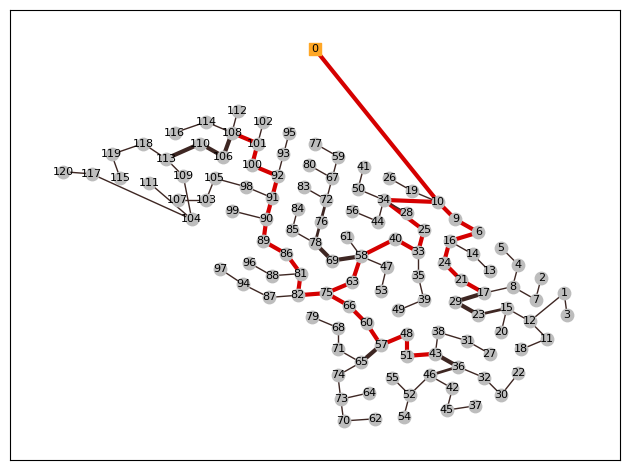

In [9]:
nx.draw_networkx_nodes(G, pos,
                       nodelist=[0],
                       node_color='#FFA726',
                       node_size=80,
                       node_shape='s')
nx.draw_networkx_nodes(G, pos,
                       nodelist=range(1, I.n+1),
                       node_color='#BDBDBD',
                       node_size=80)
nx.draw_networkx_edges(G, pos,
                       edgelist=[[x[0][0], x[0][1]] for x in solution],
                       edge_color=['#3E2723' if I.max_cable_capacity-x[1]>=0 else '#D50000' for x in solution],
                       width=[I.get_cable_index_from_node_power(x[1])+1 for x in solution])
nx.draw_networkx_labels(G, pos,
                        font_size=8)
plt.tight_layout()
plt.show()

We also have this flag implemented to force the 𝐶 turbines closest to the substation
to have an arc directly connected to the substation itself (Used at Genetic algorithms).

In [10]:
solution = grasp(I,
      starting_node=10,
      list_size=20,
      probability=0.5,
      flag=True
      )

In [11]:
print(solution)

[((44, 10), 117), ((9, 10), 2), ((6, 9), 1), ((40, 44), 116), ((33, 40), 26), ((28, 40), 8), ((25, 28), 1), ((47, 40), 81), ((19, 28), 5), ((26, 19), 4), ((16, 33), 25), ((14, 16), 24), ((13, 14), 1), ((34, 28), 1), ((24, 14), 22), ((21, 24), 21), ((17, 21), 20), ((8, 17), 16), ((41, 26), 3), ((2, 8), 15), ((58, 47), 76), ((4, 2), 2), ((5, 4), 1), ((7, 2), 10), ((29, 17), 2), ((23, 29), 1), ((12, 7), 9), ((15, 17), 1), ((1, 2), 2), ((3, 1), 1), ((11, 12), 5), ((53, 47), 4), ((50, 41), 2), ((49, 53), 3), ((56, 50), 1), ((69, 58), 75), ((78, 69), 74), ((85, 78), 47), ((76, 78), 25), ((84, 85), 46), ((72, 76), 24), ((39, 49), 2), ((83, 84), 3), ((67, 72), 23), ((35, 39), 1), ((91, 84), 42), ((59, 67), 21), ((77, 59), 20), ((20, 12), 3), ((80, 67), 1), ((90, 91), 40), ((89, 90), 35), ((86, 89), 1), ((93, 77), 19), ((96, 89), 33), ((27, 20), 2), ((31, 27), 1), ((88, 96), 31), ((101, 93), 17), ((81, 88), 29), ((82, 81), 28), ((97, 96), 1), ((95, 93), 1), ((98, 91), 1), ((75, 82), 26), ((94, 

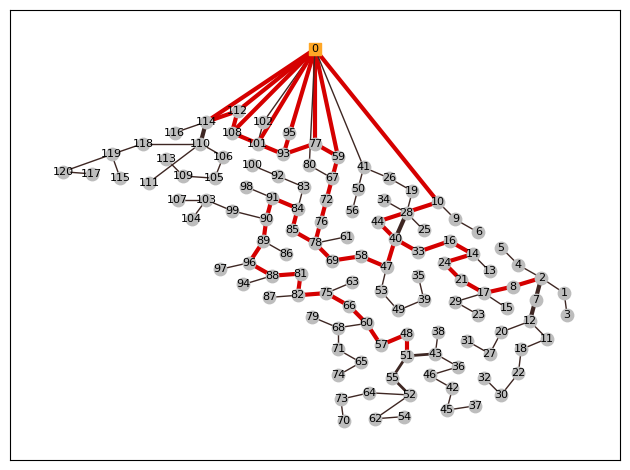

In [12]:
nx.draw_networkx_nodes(G, pos,
                       nodelist=[0],
                       node_color='#FFA726',
                       node_size=80,
                       node_shape='s')
nx.draw_networkx_nodes(G, pos,
                       nodelist=range(1, I.n+1),
                       node_color='#BDBDBD',
                       node_size=80)
nx.draw_networkx_edges(G, pos,
                       edgelist=[[x[0][0], x[0][1]] for x in solution],
                       edge_color=['#3E2723' if I.max_cable_capacity-x[1]>=0 else '#D50000' for x in solution],
                       width=[I.get_cable_index_from_node_power(x[1])+1 for x in solution])
nx.draw_networkx_labels(G, pos,
                        font_size=8)
plt.tight_layout()
plt.show()